In [15]:
import pandas as pd
import plotly.express as px
import geopandas as gpd
import pandas as pd
import plotly.express as px

df = pd.read_csv("data/scraped/2020-dea.csv")
df = df[df["drug"] == "9050 - CODEINE"]
df["zip_code"] = df["zip_code"].astype(str)
df

,drug,state_code,state_name,zip_code,code,q1,q2,q3,q4,Unnamed: 9
3163,9050 - CODEINE,AK,ALASKA,995,995,1796.58,1516.86,1827.30,1673.88,NaN
3164,9050 - CODEINE,AK,ALASKA,996,996,791.53,768.52,935.92,765.20,NaN
3165,9050 - CODEINE,AK,ALASKA,997,997,1728.10,1515.53,1636.67,1475.42,NaN
3166,9050 - CODEINE,AK,ALASKA,998,998,282.52,218.98,253.78,244.76,NaN
3167,9050 - CODEINE,AK,ALASKA,999,999,209.40,159.31,221.74,237.95,NaN
...,...,...,...,...,...,...,...,...,...,...
4052,9050 - CODEINE,WY,WYOMING,827,827,264.65,199.82,251.38,212.52,NaN
4053,9050 - CODEINE,WY,WYOMING,828,828,186.17,166.81,178.42,239.39,NaN
4054,9050 - CODEINE,WY,WYOMING,829,829,293.94,377.93,380.14,348.09,NaN
4055,9050 - CODEINE,WY,WYOMING,830,830,113.26,97.24,130.40,103.87,NaN


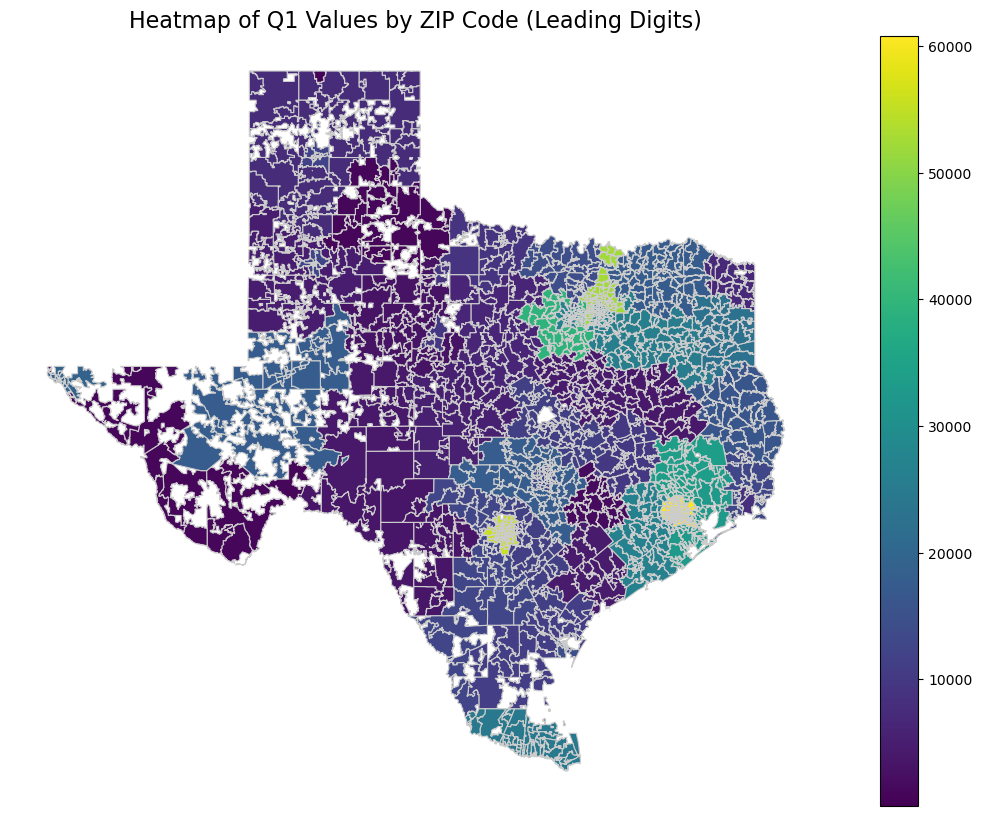

In [16]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Download ZIP code GeoJSON file (use any reliable source for ZIP shape data)
# zip_geojson_url = "https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/ca_california_zip_codes_geo.min.json"
zip_geojson_url = "https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/tx_texas_zip_codes_geo.min.json"
gdf = gpd.read_file(zip_geojson_url)

# Ensure ZIP codes match the leading digits
gdf["zip_code"] = gdf["ZCTA5CE10"].str[:3]  # Adjust to match leading digits

# Merge your data with the GeoDataFrame
merged = gdf.merge(df, on="zip_code", how="left")

# Plot the heatmap
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(
    column="q1",
    cmap="viridis",
    linewidth=0.8,
    ax=ax,
    edgecolor="0.8",
    legend=True,
)

ax.set_title("Heatmap of Q1 Values by ZIP Code (Leading Digits)", fontsize=16)
ax.axis("off")

plt.show()

In [9]:
zip_shapefile_path = "/Users/niall/Downloads/tl_2024_us_zcta520/tl_2024_us_zcta520.shp"
gdf = gpd.read_file(zip_shapefile_path)

# Extract the leading digits of ZIP codes to match your data
gdf["zip_code"] = gdf["ZCTA5CE20"].str[:3]

# Merge your data with the GeoDataFrame
merged = gdf.merge(df, on="zip_code", how="left")

# If needed, reproject to WGS84
merged = merged.to_crs("EPSG:4326")

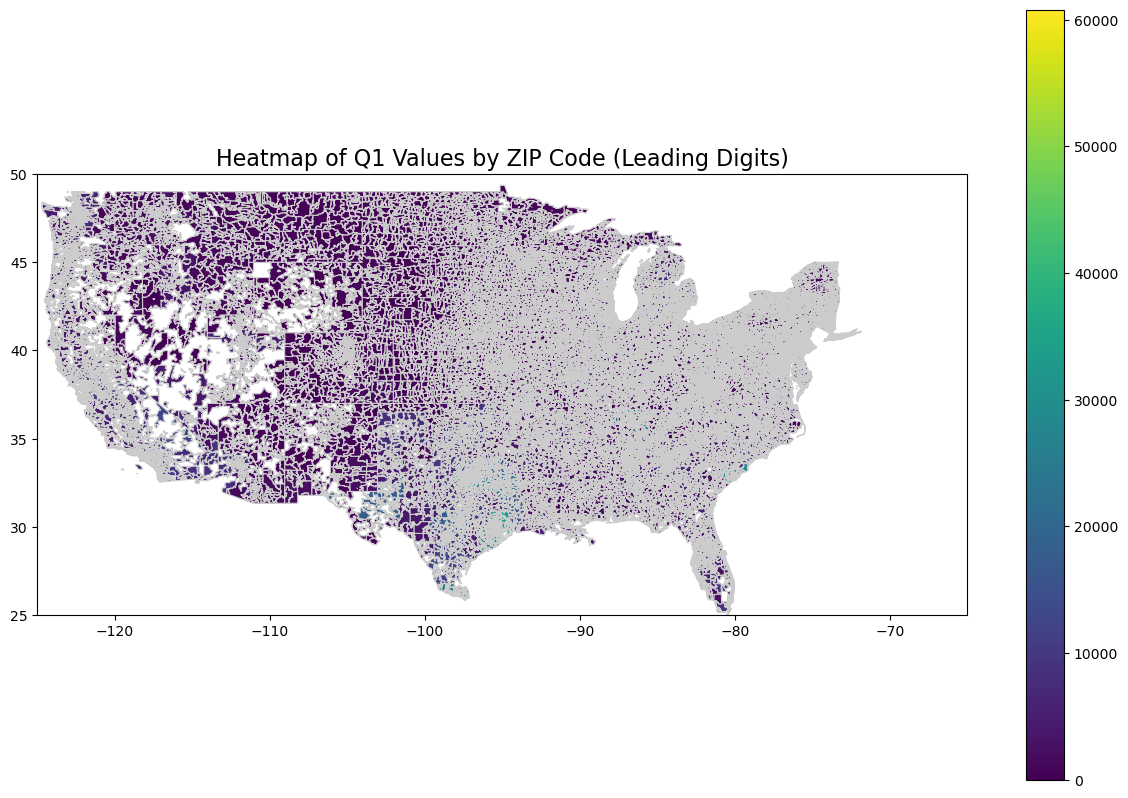

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(
    column="q1",
    cmap="viridis",
    linewidth=0.8,
    ax=ax,
    edgecolor="0.8",
    legend=True,
)
# Set bounds for continental US
ax.set_xlim([-125, -65])  # Longitude
ax.set_ylim([25, 50])     # Latitude
ax.set_title("Heatmap of Q1 Values by ZIP Code (Leading Digits)", fontsize=16)
plt.show()

In [12]:
# Ensure GeoDataFrame is in GeoJSON format
merged_geojson = merged.to_crs("EPSG:4326").__geo_interface__

# Plot with Plotly
fig = px.choropleth_mapbox(
    merged,
    geojson=merged_geojson,
    locations="index",  # Use the index or a unique identifier
    featureidkey="properties.index",  # Match the unique key in GeoJSON
    color="q1",  # The column to map values
    color_continuous_scale="Viridis",
    mapbox_style="carto-positron",
    center={"lat": 37.0902, "lon": -95.7129},  # Center of the US
    zoom=4,
    title="Heatmap of Q1 Values by ZIP Code (Leading Digits)",
)

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

ValueError: Value of 'locations' is not the name of a column in 'data_frame'. Expected one of ['ZCTA5CE20', 'GEOID20', 'GEOIDFQ20', 'CLASSFP20', 'MTFCC20', 'FUNCSTAT20', 'ALAND20', 'AWATER20', 'INTPTLAT20', 'INTPTLON20', 'geometry', 'zip_code', 'drug', 'state_code', 'state_name', 'q1', 'q2', 'q3', 'q4', 'total'] but received: index
 To use the index, pass it in directly as `df.index`.